In [1]:
from obspy import UTCDateTime
from obspy import Stream
from obspy import read
from obspy.clients.fdsn import Client
import os
import json

In [2]:
t = UTCDateTime(2021, 6, 5, 10, 55, 58) # largest event time

start_time = UTCDateTime("2021-06-05 00:00:00")
end_time = UTCDateTime("2021-06-06 00:00:00")
lon = -115.635
lat = 33.140
depth = 5.8

# chan_priority_list=["HH[ZNE12]", "BH[ZNE12]", "EH[ZNE12]", "HN[ZNE12]"]
chan_priority_list=["HHZ", "HHN", "HHE", "HH1", "HH2",
                    "BHZ", "BHN", "BHE", "BH1", "BH2",
                    "EHZ", "EHN", "EHE", "EH1", "EH2",
                    "HNZ", "HNN", "HNE", "HN1", "HN2"]

client1 = Client("IRIS")
client2 = Client("SCEDC")

IRIS_inventory = client1.get_stations(
    starttime=start_time, endtime=end_time,
    longitude=lon, latitude=lat, maxradius=0.5)

SCEDC_inventory = client2.get_stations(
    starttime=start_time, endtime=end_time,
    longitude=lon, latitude=lat, maxradius=0.5)



In [3]:
print(IRIS_inventory)
print(SCEDC_inventory)

Inventory created at 2022-09-22T00:22:25.680600Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.50
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2021-06-05...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (9):
			AZ, BC, CI, EN, NP, PB, SB, SY, ZY
		Stations (96):
			AZ.TONN (Tonner Ranch, Anza, CA, USA)
			AZ.USGCB (US Gypsum Company, site B (borehole), CA, USA)
			BC.CEA0 (Planta de bombeo La Rosita)
			BC.ICBC (Instituto Cultural de Baja California)
			CI.BOM (Bombay Beach)
			CI.CLI2 (Calipatria 2)
			CI.COK2 (Cook Ranch 2)
			CI.CRR (Carrizo)
			CI.DRE (Desert Research Extended Center)
			CI.ERR (Elmore's Ranch)
			CI.FRK (Frink)
			CI.IMP (Imperial)
			CI.NSS2 (North Shore Salton Sea 2)
			CI.Q0027 (1001 West Kramer Road)
			CI.Q0082 (Netquake Q0082)
			CI.RXH (Rock Hill)
			CI.SAL (Salton City)
			CI.SGL (Signal Mtn)
			CI.SLB (Salton Beach)
			CI.SLV (Salvation Pass)
			CI.SNR (Schaffner Ranch)
			CI.SWS (Sam W. Stewart)
			CI.WI

In [ ]:
for ev in IRIS_inventory:
    print(ev.code)
    for st in ev:
        print(st.channels)
        print(st.code)
        print(st.latitude)

In [4]:
IRIS_contents = IRIS_inventory.get_contents()
SCEDC_contents = SCEDC_inventory.get_contents()

In [ ]:
print(IRIS_contents["networks"])
print(len(IRIS_contents["stations"]))

In [5]:
IRIS_waveforms = []
SCEDC_waveforms = []

In [ ]:
l = IRIS_contents['stations'][0].split()
print(l)
net = l[0].split('.')[0]
sta = l[0].split('.')[1]

In [ ]:
st = client1.get_waveforms(net, sta, "*", "*", start_time, end_time)
st.plot()

In [ ]:
start_time_file = (f"{start_time.year}{str(start_time.month).zfill(2)}{str(start_time.day).zfill(2)}T{str(start_time.hour).zfill(2)}{str(start_time.minute).zfill(2)}{str(start_time.second).zfill(2)}Z")
end_time_file = (f"{end_time.year}{str(end_time.month).zfill(2)}{str(end_time.day).zfill(2)}T{str(end_time.hour).zfill(2)}{str(end_time.minute).zfill(2)}{str(end_time.second).zfill(2)}Z")
for s in st:
#     print(s.stats.station, s.stats.channel)
    if s.stats.channel in chan_priority_list:
        s.write(f"waveforms/{s.stats.network}.{s.stats.station}.{s.stats.channel}__{start_time_file}__{end_time_file}.mseed", format="MSEED")
#     else:
#         st.remove(s)   
#         print(st)
# st[0].stats.channel

In [ ]:
l = IRIS_contents['stations'][1].split()
print(l)
net = l[0].split('.')[0]
sta = l[0].split('.')[1]

st = client1.get_waveforms(net, sta, "*", "*", start_time, end_time)
st.plot()

In [ ]:
for i in range(len(IRIS_waveforms)):
    print(IRIS_waveforms[i])

In [6]:
start_time_file = (f"{start_time.year}{str(start_time.month).zfill(2)}{str(start_time.day).zfill(2)}T{str(start_time.hour).zfill(2)}{str(start_time.minute).zfill(2)}{str(start_time.second).zfill(2)}Z")
end_time_file = (f"{end_time.year}{str(end_time.month).zfill(2)}{str(end_time.day).zfill(2)}T{str(end_time.hour).zfill(2)}{str(end_time.minute).zfill(2)}{str(end_time.second).zfill(2)}Z")

In [ ]:
for i in IRIS_contents["stations"]:
    print(i)

In [7]:
out_station_json_file='station_list.json'

station_list = {}

for ev in IRIS_inventory:
    for st in ev:
        station_list[st.code] = {"latitude": st.latitude, "longitude": st.longitude}
        
with open(out_station_json_file, 'w') as fp:
    json.dump(station_list, fp)

In [10]:
os.mkdir("waveforms_IRIS")

st_list = []
for i in IRIS_contents["stations"]:
    curr = i.split()
    
    network = curr[0].split('.')[0]
    station = curr[0].split('.')[1]
    try:
        wave_form = client1.get_waveforms(network, station, "*", "*", start_time, end_time)

    except:
        print(f"No data available for {network}.{station}")
        
    for s in wave_form:

        if s.stats.channel in chan_priority_list:
            s.write(f"waveforms_IRIS/{s.stats.network}.{s.stats.station}.{s.stats.channel}__{start_time_file}__{end_time_file}.mseed", format="MSEED")
            
            if s.stats.station not in st_list:
                st_list.append(s.stats.station)


No data available for BC.CEA0
No data available for BC.ICBC
No data available for CI.BOM
No data available for CI.CLI2
No data available for CI.COK2
No data available for CI.CRR
No data available for CI.DRE
No data available for CI.ERR
No data available for CI.FRK
No data available for CI.IMP
No data available for CI.NSS2
No data available for CI.Q0027
No data available for CI.Q0082
No data available for CI.RXH
No data available for CI.SAL
No data available for CI.SGL
No data available for CI.SLB
No data available for CI.SLV
No data available for CI.SNR
No data available for CI.WI2
No data available for CI.WMD
No data available for CI.WWF
No data available for EN.ELM
No data available for EN.ENG
No data available for EN.HAT
No data available for EN.LIN
No data available for EN.OBS
No data available for EN.RED
No data available for EN.SIM
No data available for EN.YOU
No data available for NP.117
No data available for NP.412
No data available for NP.464
No data available for NP.5028
No d

In [11]:
waveform_IRIS_files = os.listdir("waveforms_IRIS")
print(len(waveform_IRIS_files))

54


In [12]:
net_list = []
sta_list = []

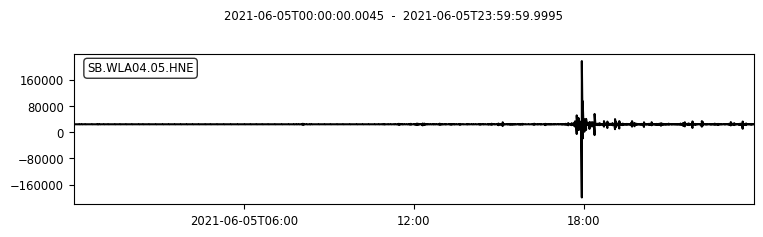

In [13]:
for i in waveform_IRIS_files:
    if i != '.DS_Store':
        wf = read("waveforms_IRIS/" + i)
        wf.plot()
        break

In [14]:
os.mkdir("waveforms_SCEDC")

In [15]:
out_station_json_file='station_list_SCEDC.json'

station_list = {}

for ev in SCEDC_inventory:
    for st in ev:
        station_list[st.code] = {"latitude": st.latitude, "longitude": st.longitude}
        
with open(out_station_json_file, 'w') as fp:
    json.dump(station_list, fp)

In [16]:
st_list = []
# wave_form = ''

for i in SCEDC_contents["stations"]:
    curr = i.split()

    network = curr[0].split('.')[0]
    station = curr[0].split('.')[1]
    
    try:
        wave_form = client2.get_waveforms(network, station, "*", "*", start_time, end_time)

    except:
        print(f"No data available for {network}.{station}")


    for s in wave_form:

        if s.stats.channel in chan_priority_list:
            s.write(f"waveforms_SCEDC/{s.stats.network}.{s.stats.station}.{s.stats.channel}__{start_time_file}__{end_time_file}.mseed", format="MSEED")

            if s.stats.station not in st_list:
                st_list.append(s.stats.station)

No data available for AZ.TONN
No data available for BC.CEA0
No data available for CE.01711
No data available for CE.01794
No data available for CE.11023
No data available for CE.11217
No data available for CE.11369
No data available for CE.11591
No data available for CE.11627
No data available for CE.11628
No data available for CE.11684
No data available for CE.12626
No data available for CI.ERR
No data available for CI.FRK
No data available for CI.IMP
No data available for CI.IRG5
No data available for CI.NSS2
No data available for CI.Q0027
No data available for CI.Q0082
No data available for CI.RXH
No data available for CI.SAL
No data available for CI.SGL
No data available for CI.SLB
No data available for CI.SLV
No data available for CI.SNR
No data available for CI.SWS
No data available for CI.WMD
No data available for CI.WWF
No data available for EN.ELM
No data available for EN.ENG
No data available for EN.HAT
No data available for EN.LIN
No data available for EN.OBS
No data availab

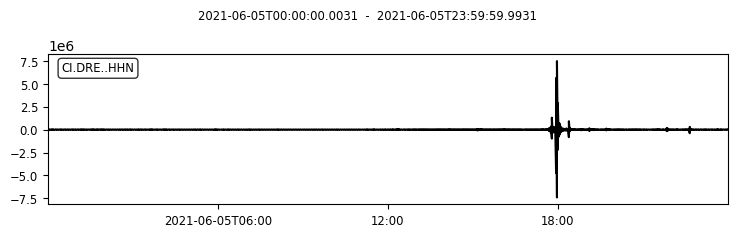

In [17]:
waveform_SCEDC_files = os.listdir("waveforms_SCEDC")

for i in waveform_SCEDC_files:
    if i != '.DS_Store':
        wf = read("waveforms_SCEDC/" + i)
        wf.plot()
        break